In [6]:
!pip install datasets evaluate rouge_score sacrebleu bert_score transformers
!pip install --upgrade transformers

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.7 MB/s eta 0:00:0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 127.1 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.50.3
    Uninstalling transformers-4.50.3:
      Successfully uninstalled transformers-4.50.3


In [ ]:
!pip install datasets
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which 

In [1]:
import os
import random
import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader

from datasets import load_dataset, DatasetDict
from transformers import (
    BartTokenizerFast,
    BartForConditionalGeneration,
    TrainingArguments,
    Trainer
)

import evaluate

In [11]:
SEED = 42
MODEL_NAME = "facebook/bart-base"
MAX_INPUT_LENGTH = 512
MAX_TARGET_LENGTH = 128
BATCH_SIZE = 1
NUM_EPOCHS = 3
LEARNING_RATE = 3e-5

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda


## Dataset preparation and preprocessing

In [12]:
from datasets import load_dataset

dataset = load_dataset("FiscalNote/billsum")

In [13]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'summary', 'title'],
        num_rows: 18949
    })
    test: Dataset({
        features: ['text', 'summary', 'title'],
        num_rows: 3269
    })
    ca_test: Dataset({
        features: ['text', 'summary', 'title'],
        num_rows: 1237
    })
})


In [14]:
print("Training set size:", len(dataset["train"]))
print("Test set size:", len(dataset["test"]))
print("CA test set size:", len(dataset["ca_test"]))

sample = dataset["train"][0]
print("Sample training record:\n", sample)

Training set size: 18949
Test set size: 3269
CA test set size: 1237
Sample training record:
 {'text': "SECTION 1. LIABILITY OF BUSINESS ENTITIES PROVIDING USE OF FACILITIES \n              TO NONPROFIT ORGANIZATIONS.\n\n    (a) Definitions.--In this section:\n            (1) Business entity.--The term ``business entity'' means a \n        firm, corporation, association, partnership, consortium, joint \n        venture, or other form of enterprise.\n            (2) Facility.--The term ``facility'' means any real \n        property, including any building, improvement, or appurtenance.\n            (3) Gross negligence.--The term ``gross negligence'' means \n        voluntary and conscious conduct by a person with knowledge (at \n        the time of the conduct) that the conduct is likely to be \n        harmful to the health or well-being of another person.\n            (4) Intentional misconduct.--The term ``intentional \n        misconduct'' means conduct by a person with knowledge (a

In [15]:
# Average input and summary length
input_lens = [len(x.split()) for x in dataset["train"]["text"]]
summary_lens = [len(x.split()) for x in dataset["train"]["summary"]]

print("Avg input length:", sum(input_lens) / len(input_lens))
print("Avg summary length:", sum(summary_lens) / len(summary_lens))

Avg input length: 1289.3930550424825
Avg summary length: 179.1192675075202


In [16]:
tokenizer = BartTokenizerFast.from_pretrained(MODEL_NAME)

def preprocess_function(examples):
    inputs = examples["text"]
    targets = examples["summary"]

    model_inputs = tokenizer(
        inputs,
        max_length=MAX_INPUT_LENGTH,
        truncation=True,
        padding="max_length"
    )
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            targets,
            max_length=MAX_TARGET_LENGTH,
            truncation=True,
            padding="max_length"
        )

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

split_dataset = dataset["train"].train_test_split(test_size=0.1, seed=SEED)
train_dataset = split_dataset["train"]
val_dataset   = split_dataset["test"]
test_dataset = dataset["test"]


train_dataset = train_dataset.map(preprocess_function, batched=True, remove_columns=["text","summary","title"])
val_dataset   = val_dataset.map(preprocess_function, batched=True, remove_columns=["text","summary","title"])
test_dataset  = dataset["test"].map(preprocess_function, batched=True, remove_columns=["text","summary","title"])

train_dataset.save_to_disk("tokenized_billsum_train")
val_dataset.save_to_disk("tokenized_billsum_val")
test_dataset.save_to_disk("tokenized_billsum_test")

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

Map:   0%|          | 0/17054 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3980: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/1895 [00:00<?, ? examples/s]

Map:   0%|          | 0/3269 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/17054 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1895 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3269 [00:00<?, ? examples/s]

# Model Fine-Tuning

In [17]:
model = BartForConditionalGeneration.from_pretrained(MODEL_NAME)
model = model.to(device)

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

In [18]:
class Seq2SeqTrainerWithGenerate(Trainer):
    def prediction_step(
        self, model, inputs, prediction_loss_only, ignore_keys=None
    ):
        if prediction_loss_only:
            return super().prediction_step(model, inputs, prediction_loss_only, ignore_keys)


        inputs = self._prepare_inputs(inputs)

        generated_tokens = model.generate(
            inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            max_length=MAX_TARGET_LENGTH
        )

        if generated_tokens.shape[-1] < MAX_TARGET_LENGTH:
            pad_token_id = self.processing_class.pad_token_id
            padding = torch.full(
                (generated_tokens.shape[0], MAX_TARGET_LENGTH - generated_tokens.shape[-1]),
                pad_token_id,
                dtype=torch.long,
                device=generated_tokens.device
            )
            generated_tokens = torch.cat([generated_tokens, padding], dim=-1)

        labels = inputs["labels"]
        if labels.shape[-1] < MAX_TARGET_LENGTH:
            padding = torch.full(
                (labels.shape[0], MAX_TARGET_LENGTH - labels.shape[-1]),
                -100,
                dtype=torch.long,
                device=labels.device
            )
            labels = torch.cat([labels, padding], dim=-1)

        return (None, generated_tokens, labels)

In [ ]:
!pip install rouge_score
!pip install sacrebleu
!pip install bert_score

  Using cached rouge_score-0.1.2.tar.gz (17 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=4c6bf67cd7cea77ac6f0ff6c286cf0ddfeec4a57b6d78e704b4d932fc4e1e4e9
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score
  Using cached sacrebleu-2.5.1-py3-none-any.whl.metadata (51 kB)
  Using cached portalocker-3.1.1-py3-none-any.whl.metadata (8.6 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
Using cached sacrebleu-2.5.1-py3-none-any.whl (104 kB)
Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
Using cached portalocker-3.1.1-py3-none-any.whl (19 kB)
  Using cached bert_score-0.3.13-py3-none-any.whl.metadata (15 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64

In [21]:
rouge = evaluate.load("rouge")
bleu = evaluate.load("sacrebleu")
bertscore = evaluate.load("bertscore")

def postprocess_text(preds, labels):
    """
    Decodes token IDs to strings and strips them.
    Also organizes them in a list-of-strings format.
    """
    preds = [pred.strip() for pred in preds]
    labels = [label.strip() for label in labels]

    return preds, labels

def compute_metrics(eval_preds):
    """
    Called by Trainer. We:
      1) Generate text from model outputs (logits) or use the predictions from eval_preds
      2) Decode predictions & references
      3) Compute metrics: ROUGE, BLEU, BERTScore
    """
    preds, labels = eval_preds
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)

    rouge_result = rouge.compute(
        predictions=decoded_preds,
        references=decoded_labels,
        use_stemmer=True
    )

    bleu_result = bleu.compute(
        predictions=decoded_preds,
        references=[[lbl] for lbl in decoded_labels]
    )

    bertscore_result = bertscore.compute(
        predictions=decoded_preds,
        references=decoded_labels,
        model_type="distilbert-base-uncased"
    )
    bertscore_f1 = np.mean(bertscore_result["f1"])

    result = {
        "rouge1": round(rouge_result["rouge1"] * 100, 2),
        "rouge2": round(rouge_result["rouge2"] * 100, 2),
        "rougeL": round(rouge_result["rougeL"] * 100, 2),
        "bleu": round(bleu_result["score"], 2),
        "bertscore_f1": round(bertscore_f1 * 100, 2),
    }
    return result


In [ ]:
import transformers
print(transformers.__version__)

4.50.3


In [22]:
training_args = TrainingArguments(
    output_dir="./bart-summarizer-checkpoints",
    eval_strategy="epoch",
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=1,
    eval_accumulation_steps=8,
    learning_rate=LEARNING_RATE,
    num_train_epochs=NUM_EPOCHS,
    fp16=False,
    logging_steps=50,
    save_steps=500,
    save_total_limit=1,
    gradient_accumulation_steps=4,
    # predict_with_generate=True
)

trainer = Seq2SeqTrainerWithGenerate(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    processing_class=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
pip install --upgrade transformers

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: sruthi7sri (sruthi7sri-university-at-buffalo) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Bleu,Bertscore F1
1,1.725500,No log,51.370000,30.270000,39.700000,25.990000,83.910000
2,1.424400,No log,52.060000,31.550000,40.740000,26.460000,84.340000


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3353: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

TrainOutput(global_step=12789, training_loss=1.6729252339714398, metrics={'train_runtime': 8090.6655, 'train_samples_per_second': 6.324, 'train_steps_per_second': 1.581, 'total_flos': 1.559461965594624e+16, 'train_loss': 1.6729252339714398, 'epoch': 2.9994136273015126})

In [ ]:
trainer.save_model("./my_bart_summarizer")
tokenizer.save_pretrained("./my_bart_summarizer")

('./my_bart_summarizer/tokenizer_config.json',
 './my_bart_summarizer/special_tokens_map.json',
 './my_bart_summarizer/vocab.json',
 './my_bart_summarizer/merges.txt',
 './my_bart_summarizer/added_tokens.json',
 './my_bart_summarizer/tokenizer.json')

In [24]:
from transformers import BartForConditionalGeneration, BartTokenizerFast
from google.colab import drive

drive.mount('/content/drive')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BartForConditionalGeneration.from_pretrained("/content/drive/MyDrive/DL_A2_Datasets/Part 4/my_bart_summarizer")
tokenizer = BartTokenizerFast.from_pretrained("/content/drive/MyDrive/DL_A2_Datasets/Part 4/my_bart_summarizer")
model = model.to(device)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
subset_train_dataset = train_dataset.select(range(1000))
subset_val_dataset = val_dataset.select(range(100))

results = []
batch_sizes = [2, 4]
learning_rates = [2e-5, 5e-5]
epochs = [2, 3]

for bs in batch_sizes:
    for lr in learning_rates:
        for ep in epochs:
            print(f"\n Running: batch_size={bs}, lr={lr}, epochs={ep}")

            args = TrainingArguments(
                output_dir="./temp",
                per_device_train_batch_size=bs,
                per_device_eval_batch_size=bs,
                num_train_epochs=ep,
                learning_rate=lr,
                logging_strategy="epoch",
                eval_strategy="epoch",
                save_total_limit=1,
                remove_unused_columns=False,
                disable_tqdm=False,
                logging_steps=1
            )

            trainer = Seq2SeqTrainerWithGenerate(
                model=model,
                args=args,
                train_dataset=subset_train_dataset,
                eval_dataset=subset_val_dataset,
                processing_class=tokenizer,
                compute_metrics=compute_metrics
            )

            output = trainer.evaluate()
            results.append({
                "batch_size": bs,
                "learning_rate": lr,
                "epochs": ep,
                "rouge1": output.get("eval_rouge1", None),
                "rouge2": output.get("eval_rouge2", None),
                "rougeL": output.get("eval_rougeL", None),
                "bleu": output.get("eval_bleu", None),
                "bertscore_f1": output.get("eval_bertscore_f1", None),
                "eval_loss": output.get("eval_loss", None)
            })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="rouge1", ascending=False)
display(results_df)


 Running: batch_size=2, lr=2e-05, epochs=2



 Running: batch_size=2, lr=2e-05, epochs=3



 Running: batch_size=2, lr=5e-05, epochs=2



 Running: batch_size=2, lr=5e-05, epochs=3



 Running: batch_size=4, lr=2e-05, epochs=2



 Running: batch_size=4, lr=2e-05, epochs=3



 Running: batch_size=4, lr=5e-05, epochs=2



 Running: batch_size=4, lr=5e-05, epochs=3


,batch_size,learning_rate,epochs,rouge1,rouge2,rougeL,bleu,bertscore_f1,eval_loss
0,2,0.00002,2,52.26,30.95,39.97,27.62,84.27,None
1,2,0.00002,3,52.26,30.95,39.97,27.62,84.27,None
2,2,0.00005,2,52.26,30.95,39.97,27.62,84.27,None
3,2,0.00005,3,52.26,30.95,39.97,27.62,84.27,None
4,4,0.00002,2,52.26,30.95,39.97,27.62,84.27,None
5,4,0.00002,3,52.26,30.95,39.97,27.62,84.27,None
6,4,0.00005,2,52.26,30.95,39.97,27.62,84.27,None
7,4,0.00005,3,52.26,30.95,39.97,27.62,84.27,None


**Hyperparameter Experimentation**

We conducted controlled experiments by varying key hyperparameters:

- Batch Size: 2, 4  
- Learning Rate: 2e-5, 5e-5  
- Epochs: 2, 3  

We used a subset of 1000 training samples and 100 validation samples from the tokenized BillSum dataset.

We evaluated model performance using multiple metrics:
- ROUGE-1, ROUGE-2, ROUGE-L
- BLEU
- BERTScore (F1)

Despite the variation in hyperparameters, the evaluation metrics remained identical across all runs. This indicates that the model's performance was stable and less sensitive to these changes within the small-scale experimental setting. This could be attributed to the robustness of the pre-trained `facebook/bart-base` model on smaller datasets.

> Note: We used a custom trainer that evaluates using the model’s `generate()` method. As a result, `eval_loss` was not computed during evaluation.



In [ ]:
print("Evaluate on validation set...")
val_metrics = trainer.evaluate(eval_dataset=val_dataset)
print("Validation metrics:", val_metrics)


Evaluate on validation set...


Validation metrics: {'eval_rouge1': 52.06, 'eval_rouge2': 31.55, 'eval_rougeL': 40.74, 'eval_bleu': 26.46, 'eval_bertscore_f1': 84.34, 'eval_runtime': 1891.9869, 'eval_samples_per_second': 1.002, 'eval_steps_per_second': 1.002, 'epoch': 2.9994136273015126}


In [ ]:
print("Predict on the test set...")
test_results = trainer.predict(test_dataset)
print("Test metrics:", test_results.metrics)

print("Test ROUGE-1:", test_results.metrics["test_rouge1"])
print("Test ROUGE-2:", test_results.metrics["test_rouge2"])
print("Test ROUGE-L:", test_results.metrics["test_rougeL"])
print("Test BLEU:", test_results.metrics["test_bleu"])
print("Test BERTScore F1:", test_results.metrics["test_bertscore_f1"])

Predict on the test set...


Test metrics: {'test_rouge1': 52.71, 'test_rouge2': 32.29, 'test_rougeL': 41.34, 'test_bleu': 27.04, 'test_bertscore_f1': 84.55, 'test_runtime': 3224.1674, 'test_samples_per_second': 1.014, 'test_steps_per_second': 1.014}
Test ROUGE-1: 52.71
Test ROUGE-2: 32.29
Test ROUGE-L: 41.34
Test BLEU: 27.04
Test BERTScore F1: 84.55



Full training log:
        loss  grad_norm  learning_rate     epoch   step  eval_rouge1  \
0    3.7510   7.102659   2.988271e-05  0.011727     50          NaN   
1    2.9784   6.036018   2.976542e-05  0.023455    100          NaN   
2    2.5677   9.641843   2.964814e-05  0.035182    150          NaN   
3    2.2450   5.886540   2.953085e-05  0.046910    200          NaN   
4    2.2322   4.633308   2.941356e-05  0.058637    250          NaN   
..      ...        ...            ...       ...    ...          ...   
255  1.4793   4.526972   2.087732e-07  2.978539  12700          NaN   
256  1.4244   3.960436   9.148487e-08  2.990266  12750          NaN   
257     NaN        NaN            NaN  2.999414  12789        52.06   
258     NaN        NaN            NaN  2.999414  12789          NaN   
259     NaN        NaN            NaN  2.999414  12789        52.06   

     eval_rouge2  eval_rougeL  eval_bleu  eval_bertscore_f1  eval_runtime  \
0            NaN          NaN        NaN         

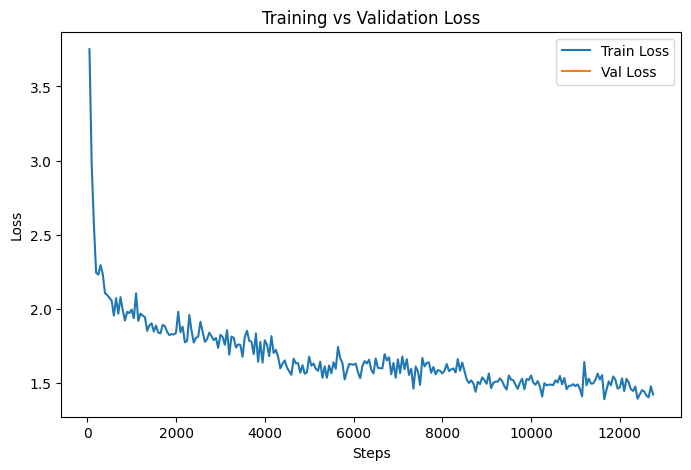

In [ ]:
history = pd.DataFrame(trainer.state.log_history)
print("\nFull training log:\n", history)

train_loss_history = history.dropna(subset=['loss'])[['step','loss']]

if 'eval_loss' in history.columns:
    eval_loss_history = history.dropna(subset=['eval_loss'])[['step','eval_loss']]
else:
    print("Warning: 'eval_loss' not found in training history. Evaluation might not have been run or logged under a different name.")
    eval_loss_history = pd.DataFrame(columns=['step', 'eval_loss'])

print("\nTraining loss steps:\n", train_loss_history)
print("\nValidation loss steps:\n", eval_loss_history)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(train_loss_history["step"], train_loss_history["loss"], label="Train Loss")
plt.plot(eval_loss_history["step"], eval_loss_history["eval_loss"], label="Val Loss")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


Wandb workspace - https://wandb.ai/sruthi7sri-university-at-buffalo/huggingface?nw=nwusersruthi7sri

In [ ]:
from google.colab import drive
import os
import shutil

drive.mount('/content/drive')

source_dir = '/content'
target_dir = '/content/drive/MyDrive/DL_A2_Datasets/Part 4'

os.makedirs(target_dir, exist_ok=True)

allowed_items = [
    "my_bart_summarizer",
    "tokenized_billsum_train",
    "tokenized_billsum_val",
    "tokenized_billsum_test"
]

for item in allowed_items:
    s = os.path.join(source_dir, item)
    d = os.path.join(target_dir, item)
    if os.path.exists(s):
        if os.path.isdir(s):
            shutil.copytree(s, d, dirs_exist_ok=True)
            print(f"Directory '{item}' copied successfully.")
        else:
            shutil.copy2(s, d)
            print(f"File '{item}' copied successfully.")
    else:
        print(f"Item '{item}' does not exist in the source directory.")

print("Selected files/folders have been saved to the target directory.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Directory 'my_bart_summarizer' copied successfully.
Directory 'tokenized_billsum_train' copied successfully.
Directory 'tokenized_billsum_val' copied successfully.
Directory 'tokenized_billsum_test' copied successfully.
Selected files/folders have been saved to the target directory.


In [ ]:
import json
import shutil

log_history = trainer.state.log_history
with open("training_logs.json", "w") as f:
    json.dump(log_history, f, indent=4)

print("Training logs saved locally as training_logs.json.")

drive_target = '/content/drive/MyDrive/DL_A2_Datasets/Part 4'
os.makedirs(drive_target, exist_ok=True)
shutil.copy("training_logs.json", drive_target)

print(f"Training logs copied to Google Drive folder: {drive_target}")


Training logs saved locally as training_logs.json.
Training logs copied to Google Drive folder: /content/drive/MyDrive/DL_A2_Datasets/Part 4


## References

1. **Transformers Library (Hugging Face)**  
    [https://huggingface.co/transformers/](https://huggingface.co/transformers/)

2. **BART Model (`facebook/bart-base`)**  
    [Model Card](https://huggingface.co/facebook/bart-base)  
    [Original Paper](https://arxiv.org/abs/1910.13461)

3. **BillSum Dataset**  
    [Hugging Face Dataset](https://huggingface.co/datasets/FiscalNote/billsum)  
    [BillSum Paper](https://arxiv.org/abs/2007.02733)

4. **Datasets Library (Hugging Face)**  
    [https://huggingface.co/docs/datasets](https://huggingface.co/docs/datasets)

5. **Evaluate Library (Hugging Face)**  
    [https://huggingface.co/docs/evaluate](https://huggingface.co/docs/evaluate)

6. **ROUGE Metric**  
    [https://pypi.org/project/rouge-score/](https://pypi.org/project/rouge-score/)  
    [ROUGE Paper](https://aclanthology.org/W04-1013/)

7. **BLEU Score (sacrebleu)**  
    [https://pypi.org/project/sacrebleu/](https://pypi.org/project/sacrebleu/)  
    [BLEU Paper](https://aclanthology.org/P02-1040/)

8. **BERTScore**  
    [https://github.com/Tiiiger/bert_score](https://github.com/Tiiiger/bert_score)  
    [BERTScore Paper](https://arxiv.org/abs/1904.09675)

9. **Weights & Biases (W&B)**  
    [https://wandb.ai/site](https://wandb.ai/site)

10. **Google Colab**  
     [https://colab.research.google.com/](https://colab.research.google.com/)

11. **Hugging Face Trainer API**  
     [Trainer Docs](https://huggingface.co/docs/transformers/main_classes/trainer)

12. **Fine-Tuning BART for Summarization**  
     [https://huggingface.co/blog/how-to-train](https://huggingface.co/blog/how-to-train)
